In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_train = x_train.reshape((50000 , 32 , 32 , 3))
x_test = x_test.reshape((10000 , 32 , 32 , 3))

In [17]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
model = tf.keras.Sequential()

In [21]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

In [22]:
model.add(Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(MaxPooling2D((2, 2)))

In [23]:
model.add(Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(MaxPooling2D((2, 2)))

In [24]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))

In [25]:
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [28]:
model.compile(loss ='categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)       

In [35]:
nn = model.fit(x_train,y_train,batch_size=32,epochs=100,validation_split=0.1)

Epoch 1/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.6809 - accuracy: 0.7571 - val_loss: 0.8935 - val_accuracy: 0.7028
Epoch 2/100
1407/1407 [==============================] - 21s 15ms/step - loss: 0.6492 - accuracy: 0.7669 - val_loss: 1.1948 - val_accuracy: 0.6112
Epoch 3/100
1407/1407 [==============================] - 21s 15ms/step - loss: 0.6182 - accuracy: 0.7781 - val_loss: 0.8271 - val_accuracy: 0.7238
Epoch 4/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.5992 - accuracy: 0.7854 - val_loss: 0.8723 - val_accuracy: 0.7150
Epoch 5/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.5769 - accuracy: 0.7936 - val_loss: 0.9522 - val_accuracy: 0.6982
Epoch 6/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.5510 - accuracy: 0.8011 - val_loss: 0.8857 - val_accuracy: 0.7166
Epoch 7/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.5381 - accuracy: 0.8064 - val_loss: 0

1407/1407 [==============================] - 20s 14ms/step - loss: 0.1268 - accuracy: 0.9530 - val_loss: 1.3381 - val_accuracy: 0.7446
Epoch 57/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.1252 - accuracy: 0.9546 - val_loss: 1.2842 - val_accuracy: 0.7480
Epoch 58/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.1216 - accuracy: 0.9567 - val_loss: 1.4036 - val_accuracy: 0.7450
Epoch 59/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.1213 - accuracy: 0.9566 - val_loss: 1.4207 - val_accuracy: 0.7404
Epoch 60/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.1212 - accuracy: 0.9561 - val_loss: 1.3503 - val_accuracy: 0.7532
Epoch 61/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.1213 - accuracy: 0.9554 - val_loss: 1.3621 - val_accuracy: 0.7344
Epoch 62/100
1407/1407 [==============================] - 20s 14ms/step - loss: 0.1130 - accuracy: 0.9582 - val_loss: 1.3049 

In [36]:
loss = nn.history['loss']

In [37]:
acc = nn.history['accuracy']

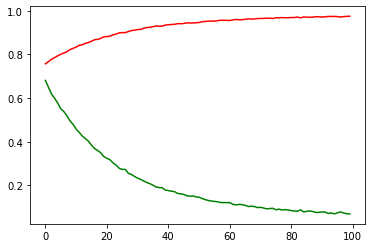

In [38]:
plt.plot(loss, c = 'green')
plt.plot(acc, c = 'red')

In [39]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [40]:
acc = model.evaluate(x_test,y_test)[1]

313/313 [==============================] - 2s 6ms/step - loss: 1.6556 - accuracy: 0.7425


In [41]:
print("Accuracy in testing data is : ", acc)

Accuracy in testing data is :  0.7425000071525574


In [42]:
import pickle

In [43]:
pickle.dump(model, open('CIFAR_Classififier.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://b2b8b801-d5bd-4101-a159-fd9c6e0806fe/assets


INFO:tensorflow:Assets written to: ram://b2b8b801-d5bd-4101-a159-fd9c6e0806fe/assets
